# 1. dataset: data_wine.csv

https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset


## Preguntas

1. ¿Qué problema de clasificación se busca resolver?

2. ¿Cuál es el dominio de entrada (caracteristicas) disponible?

3. ¿Cuántas muestras y características hay en el conjunto de datos?

4. ¿Cuántas clases o categorías tiene el conjunto de datos Wine?

5. ¿Qué tipo de problema de aprendizaje supervisado estamos abordando con este conjunto de datos? Clasificación o Regresión?

6. ¿Cuál es el rendimiento de los modelos de aprendizaje para resolver este problema?

7. ¿Cómo se puede interpretar las métricas de precision y recall?

8. ¿Cuáles son las características más influyentes en el modelo de clasificación?


1) Se busca clasificar diferentes vinos provenientes de Italia dados sus datos de un analisis quimico

2) El dataframe contiene los datos de un analisis quimico en donde mide, porcentaje de alcohol, calcio, magnesio, etc.

3) Hay en total 178 muetras con 13 caracteristicas

4) Existen 3 clases de vinos

5) Estamos abordando clasificacion ya que estamos intentando clasificar los tipos de vino a partir de los datos

In [14]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

wine = pd.read_csv("data/data_wine.csv")

wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [15]:
x = wine.drop("target", axis = 1)
y = wine["target"]

print("Dataset without tags")
x

Dataset without tags


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [16]:

print("Dataset tags")
y

Dataset tags


0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# Inicializar y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(x_train, y_train)


/home/moreno/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Coeficientes: [[-0.28827631  0.2919057   0.24198992 -0.26965709 -0.01937216  0.31863649
   0.69688816 -0.00932945  0.07836255  0.08404282 -0.02447329  0.38429219
   0.00908445]
 [ 0.68261629 -0.67572882 -0.26975922  0.11835389 -0.00644152  0.16275277
   0.28934707  0.04386327  0.38581052 -1.08008614  0.27103013  0.40668597
  -0.00776037]
 [-0.39433998  0.38382312  0.02776931  0.1513032   0.02581368 -0.48138926
  -0.98623524 -0.03453381 -0.46417307  0.99604333 -0.24655684 -0.79097816
  -0.00132408]]
Intercepto: [-0.07431238  0.1297228  -0.05541042]
Precisión del modelo de regresión logística en el conjunto de prueba: 0.98


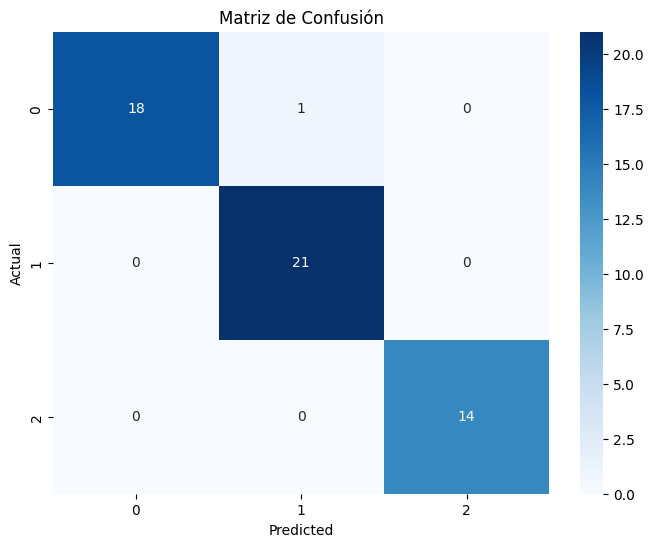

In [18]:
# Ver los coeficientes y el término de intercepción
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)

# Predecir en el conjunto de prueba
y_pred = model.predict(x_test)

# Calcular precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de regresión logística en el conjunto de prueba: {:.2f}".format(accuracy))

# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Obtener etiquetas únicas presentes en y_test y y_pred
labels = sorted(set(y_test) | set(y_pred))

# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()


In [19]:
# Calcular precision, recall y F1-score

class_names = ['clase_1', 'clase_2', 'clase_3']

report = classification_report(y_test, y_pred, target_names=class_names)

print("Reporte de Clasificación:")
print(report)

Reporte de Clasificación:
              precision    recall  f1-score   support

     clase_1       1.00      0.95      0.97        19
     clase_2       0.95      1.00      0.98        21
     clase_3       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



5)

6)


In [20]:
# PCA analysis

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(x)

PCA(n_components=2)

# 2. dataset: Kaggle

https://www.kaggle.com/datasets?fileType=csv&tags=13302-Classification&minUsabilityRating=9.00+or+higher&feedbackIds=8


Elegir un problema de clasificación con la lista de datasets disponibles y comparar el rendimiento de distintos modelos de clasificación supervisada.